# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as ltb
from sklearn.metrics import mean_squared_error,r2_score
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [4]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [5]:
data["City Group"].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [6]:
data["City"].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

In [7]:
data["Type"].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [8]:
data.drop(["Id"],axis = 1,inplace = True)

# Data Visualization:

In [9]:
def plot(data,feature,a,b):
    
    s1 = data[feature].value_counts()
    name = list(dict(s1).keys())
    val = list(dict(s1).values())
    
    plt.figure(figsize=(a, b))
    plt.title("Bar plot for {}".format(feature))
    plt.bar(name,val)
    plt.xlabel(feature, fontsize=18) # xlabel
    plt.ylabel('Count', fontsize=18)
    

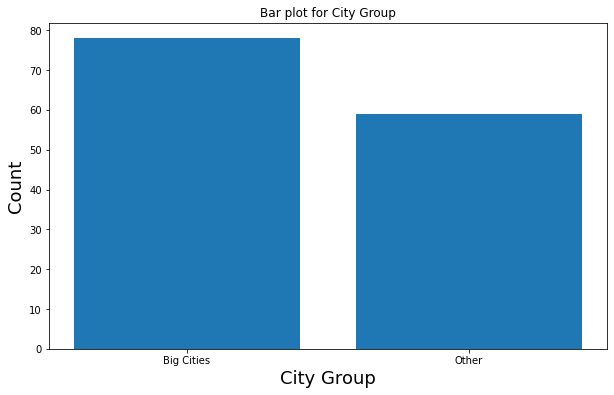

In [10]:
plot(data,'City Group',10,6)

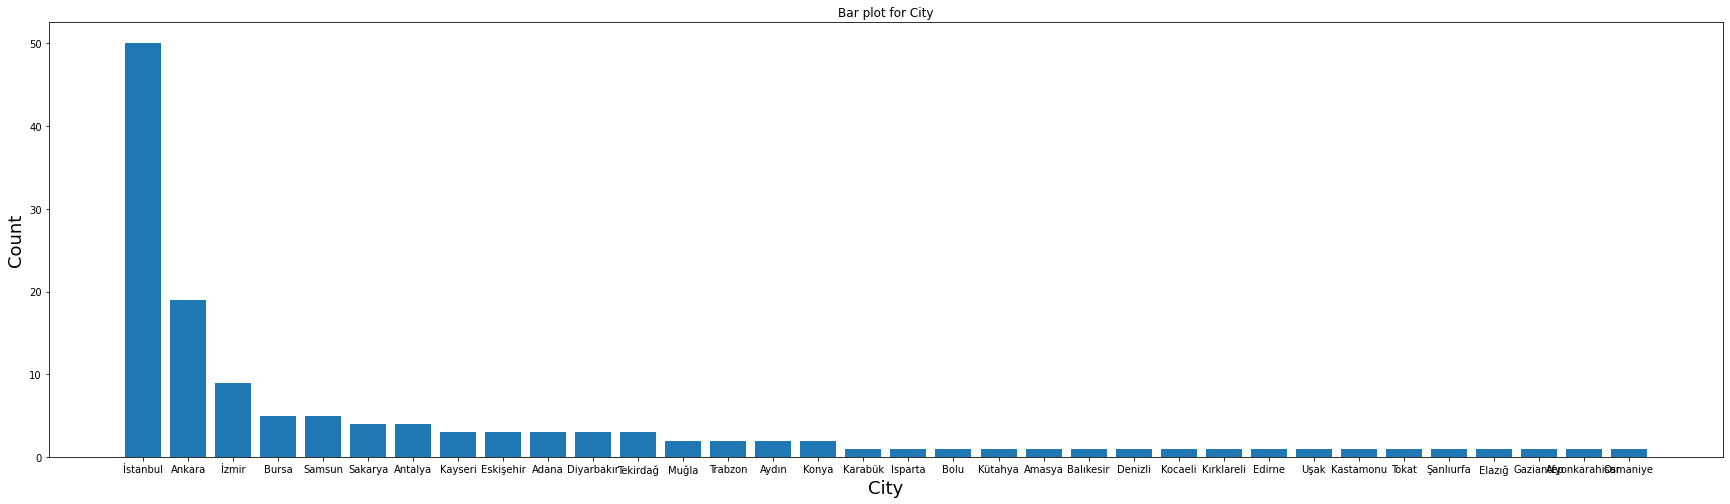

In [11]:
plot(data,'City',30,8)

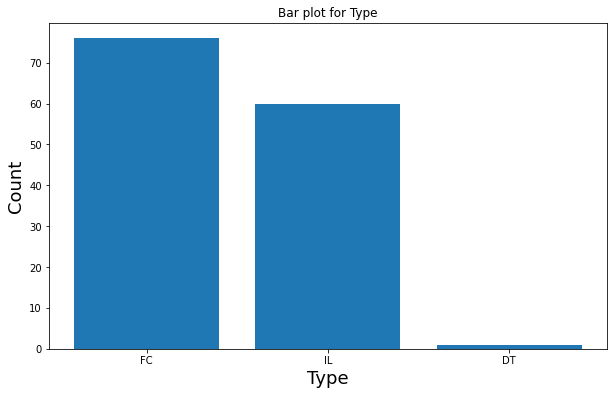

In [12]:
plot(data,'Type',10,6)

# Working with datetime features:

In [13]:
data["Open Date"] = pd.to_datetime(data['Open Date']) 
data.sort_values(by = 'Open Date', inplace = True) # sorting the date in ascending order
    
data["Year"] = pd.DatetimeIndex(data['Open Date']).year # extracting year from date
data["Month"] = pd.DatetimeIndex(data['Open Date']).month # extracting month from date
data["Week"] = pd.DatetimeIndex(data['Open Date']).week # extracting week from date

df = data.reset_index().drop(["index"], axis=1)

In [14]:
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Year,Month,Week
0,1996-05-08,Adana,Other,IL,4,5.0,4.0,3.0,1,2,...,3,3,3,4,3,3,3903884.0,1996,5,19
1,1997-04-10,İstanbul,Big Cities,IL,12,7.5,6.0,7.5,2,8,...,25,6,18,3,16,6,4286645.0,1997,4,15
2,1998-01-28,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,3,...,5,2,3,5,4,4,4705945.0,1998,1,5
3,1998-03-14,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,...,1,2,2,1,3,3,3784230.0,1998,3,11
4,1998-07-13,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,8,...,25,4,24,15,20,6,2551252.0,1998,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2013-10-25,Ankara,Big Cities,FC,3,5.0,3.0,5.0,3,4,...,0,0,0,0,0,0,1904842.0,2013,10,43
133,2013-11-12,Uşak,Other,FC,2,3.0,4.0,4.0,2,1,...,0,0,0,0,0,0,1763231.0,2013,11,46
134,2013-12-21,İzmir,Big Cities,FC,3,5.0,4.0,3.0,1,2,...,0,0,0,0,0,0,1756069.0,2013,12,51
135,2014-01-03,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,3780019.0,2014,1,1


<AxesSubplot:xlabel='Open Date', ylabel='revenue'>

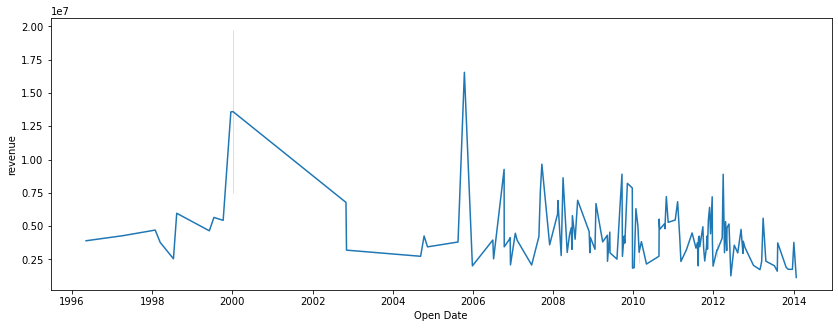

In [15]:
plt.figure(figsize=(14, 5))
sns.lineplot(x="Open Date", y="revenue", data=df,palette="Dark2")

# Data Preprocessing:

In [16]:
x = df.drop(["Open Date","revenue"], axis = 1)
y = df["revenue"]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0) # splitting the data

In [18]:
x_train.shape,x_test.shape

((123, 43), (14, 43))

In [19]:
y_train.shape,y_test.shape

((123,), (14,))

# Cyclical Encoding:

In [20]:
x_train['month_sin'] = np.sin((x_train.Month -1)*(2.*np.pi/12))
x_train['month_cos'] = np.cos((x_train.Month -1)*(2.*np.pi/12))
x_train['weekday_sin'] = np.sin((x_train.Week-1)*(2.*np.pi/53))
x_train['weekday_cos'] = np.cos((x_train.Week-1)*(2.*np.pi/53))

In [21]:
# Adding the encoded values to test set.
x_test['month_sin'] = np.sin((x_test.Month -1)*(2.*np.pi/12))
x_test['month_cos'] = np.cos((x_test.Month -1)*(2.*np.pi/12))
x_test['weekday_sin'] = np.sin((x_test.Week-1)*(2.*np.pi/53))
x_test['weekday_cos'] = np.cos((x_test.Week-1)*(2.*np.pi/53))

# Cat Boost Encoding:

In [22]:
label = ["City","City Group","Type"]
cbe_encoder = ce.cat_boost.CatBoostEncoder()

In [23]:
x_train[label] = cbe_encoder.fit_transform(x_train[label],y_train)
x_test[label] = cbe_encoder.transform(x_test[label],y_test)

In [24]:
x_test.head(5)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P35,P36,P37,Year,Month,Week,month_sin,month_cos,weekday_sin,weekday_cos
26,4.437548e+06,4.437548e+06,4.437548e+06,12,7.5,6.0,6.0,2,10,10,...,12,12,6,2006,12,49,-5.000000e-01,8.660254e-01,-0.558647,0.829406
8,4.437548e+06,4.437548e+06,4.437548e+06,4,5.0,4.0,3.0,1,2,5,...,0,0,0,1999,10,40,-1.000000e+00,-1.836970e-16,-0.996050,-0.088796
86,4.936412e+06,4.936412e+06,4.936412e+06,3,3.0,4.0,4.0,2,2,5,...,0,0,0,2011,7,30,1.224647e-16,-1.000000e+00,-0.292057,-0.956401
78,4.286987e+06,4.286987e+06,4.408069e+06,4,5.0,4.0,5.0,2,2,5,...,0,0,0,2010,10,43,-1.000000e+00,-1.836970e-16,-0.964636,0.263587
43,4.437548e+06,4.408069e+06,5.110460e+06,2,3.0,3.0,5.0,4,2,4,...,0,0,0,2008,6,26,5.000000e-01,-8.660254e-01,0.176890,-0.984231


# Final Dataframe:

In [25]:
training_data = x_train.drop(["Year","Month","Week"], axis = 1)
testing_data = x_test.drop(["Year","Month","Week"], axis = 1)

# Modeling:

# Linear Regression:

In [26]:
lr = LinearRegression()
lr.fit(training_data,y_train)

LinearRegression()

In [27]:
pred_lr = lr.predict(testing_data)

In [28]:
mse_test = mean_squared_error(y_test,pred_lr)

print("RMSE test :",math.sqrt(mse_test))

RMSE test : 3206139.8059547474


# Random Forest Regressor:

In [29]:
rf = RandomForestRegressor()
rf.fit(training_data,y_train)

RandomForestRegressor()

In [30]:
pred_rf = rf.predict(testing_data)

In [31]:
mse_test = mean_squared_error(y_test,pred_rf)

print("RMSE test :",math.sqrt(mse_test))

RMSE test : 1720231.6795392274


# LGB Regressor:

In [32]:
lgb = ltb.LGBMRegressor()
lgb.fit(training_data, y_train)

LGBMRegressor()

In [33]:
pred_lgb = lgb.predict(testing_data)

In [34]:
mse_test = mean_squared_error(y_test,pred_lgb)

print("RMSE test :",math.sqrt(mse_test))

RMSE test : 1279587.0629699845


# Light Gradient Boosting gives lowest RMSE value